# Import library

In [3]:
!pip uninstall keras keras-core tensorflow -y -q
!pip install tensorflow==2.15.0 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 103.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 7.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorstore 0.1.72 requires ml_dtypes>=0.3.1, but you have ml-dtypes 0.2.0 which is incompatible.
tf-keras 2.18.0 

In [1]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import plot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Đọc và Hiểu bộ dữ liệu hiện có (Phát hiện gian lận trong thẻ tín dụng)

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
df.shape

(284807, 31)

In [12]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [13]:
df.duplicated().sum()

np.int64(1081)

In [14]:
print(f"Khoảng dao động trong các cột")
print(df.max() - df.min())

Khoảng dao động trong các cột
Time      172792.000000
V1            58.862440
V2            94.773457
V3            57.708148
V4            22.558515
V5           148.544973
V6            99.462131
V7           164.146736
V8            93.223927
V9            29.029061
V10           48.333399
V11           16.816387
V12           26.532107
V13           12.918764
V14           29.741092
V15           13.376686
V16           31.444966
V17           34.416326
V18           14.539815
V19           12.805499
V20           93.918625
V21           62.033221
V22           21.436234
V23           67.336147
V24            7.421176
V25           17.814986
V26            6.121896
V27           54.177877
V28           49.277892
Amount     25691.160000
Class          1.000000
dtype: float64


In [15]:
print(f'Khoảng trung vị của từng cột')
print(df.median())

Khoảng trung vị của từng cột
Time      84692.000000
V1            0.018109
V2            0.065486
V3            0.179846
V4           -0.019847
V5           -0.054336
V6           -0.274187
V7            0.040103
V8            0.022358
V9           -0.051429
V10          -0.092917
V11          -0.032757
V12           0.140033
V13          -0.013568
V14           0.050601
V15           0.048072
V16           0.066413
V17          -0.065676
V18          -0.003636
V19           0.003735
V20          -0.062481
V21          -0.029450
V22           0.006782
V23          -0.011193
V24           0.040976
V25           0.016594
V26          -0.052139
V27           0.001342
V28           0.011244
Amount       22.000000
Class         0.000000
dtype: float64


In [16]:
total_fraud_transactions = sum(df['Class'] == 1)
print(f"Số lượng giao dịch gian lận: {total_fraud_transactions}")
print()
print(f'Phần trăm số lượng giao dịch có gian lận trên tổng số: {round((total_fraud_transactions / df.size), 6) * 100}%')

Số lượng giao dịch gian lận: 492

Phần trăm số lượng giao dịch có gian lận trên tổng số: 0.0056%


# Xử lý dữ liệu trước khi train, vì có sự chênh lệch giữa hai lớp với nhau (normal - fraud)

In [17]:
from imblearn.over_sampling import SMOTE # Sử dụng SMOTE để tăng hoặc giảm lượng dữ liệu giữa hai lớp cho phù hợp
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline # Xây dựng Pipeline
from tensorflow.keras.layers import Normalization # Chuẩn hoá dữ liệu về cùng một khoảng để tránh sự chênh lệch

In [18]:
np.random.seed(42)

In [19]:
oversampler = SMOTE(sampling_strategy=0.2)
undersampler = RandomUnderSampler(sampling_strategy=0.3)

steps = [('oversample', oversampler), ('undersample', undersampler)]
samplePipe = imbPipeline(steps=steps)

preprocessing = Normalization(axis=-1)


In [20]:
X, y = df[df.columns.drop('Class')], df['Class']
X = X.to_numpy() if isinstance(X, pd.DataFrame) else np.array(X)

preprocessing.adapt(X)
X = pd.DataFrame(preprocessing(X), columns=[df[df.columns.drop('Class')].columns.values])

X_train, X_testValid, y_train, y_testValid = train_test_split(X, y, test_size=0.2)
X_test, X_valid, y_test, y_valid = train_test_split(X_testValid, y_testValid, test_size=0.5)

X_train, y_train = samplePipe.fit_resample(X_train, y_train)


# Sequence Model

In [42]:
controlModel = keras.models.Sequential([
    tf.keras.layers.InputLayer((30,)),
    tf.keras.layers.Dense(360, activation='relu'),
    tf.keras.layers.Dense(720, activation='relu'),
    tf.keras.layers.Dense(360, activation="relu"),
    tf.keras.layers.Dense(120, activation="relu"),
    tf.keras.layers.Dense(60, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(2, activation="sigmoid")
])

controlModel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), loss="sparse_categorical_crossentropy", metrics=['sparse_categorical_accuracy'])

In [43]:
controlHistory = controlModel.fit(X_train, y_train, epochs=15, batch_size=64000, validation_data=(X_valid, y_valid))

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 26s 5s/step - loss: 9.6250 - sparse_categorical_accuracy: 0.3907 - val_loss: 0.6235 - val_sparse_categorical_accuracy: 0.9988
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - loss: 0.5953 - sparse_categorical_accuracy: 0.8824 - val_loss: 0.2545 - val_sparse_categorical_accuracy: 0.9992
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - loss: 0.2660 - sparse_categorical_accuracy: 0.9470 - val_loss: 0.0665 - val_sparse_categorical_accuracy: 0.9803
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - loss: 0.1331 - sparse_categorical_accuracy: 0.9689 - val_loss: 0.0428 - val_sparse_categorical_accuracy: 0.9906
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - loss: 0.0871 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0526 - val_sparse_categorical_accuracy: 0.9904
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - loss: 0.0684 - sparse_categorical_accuracy: 0.9811 - val_loss: 0.0345 - val_sparse_categorical_accuracy: 0.9931
Epoch 7/15
4/4 ━━━━━━━━━━━━━

<Axes: >

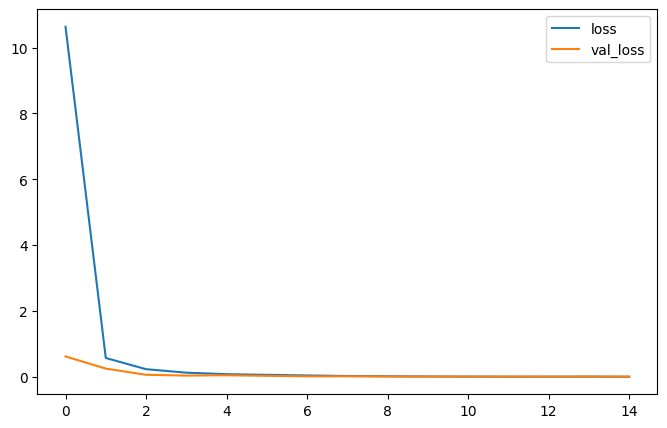

In [44]:
pd.DataFrame(controlHistory.history)[['loss','val_loss']].plot(figsize=(8,5))

In [45]:
controlModel.evaluate(X_test, y_test)

891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0086 - sparse_categorical_accuracy: 0.9977


[0.010613965801894665, 0.9975773096084595]

In [46]:
predictions = controlModel.predict(X_test)
y_pred = np.argmax(predictions, axis=-1)

891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [47]:
f1_score(y_pred, y_test)

0.5454545454545454

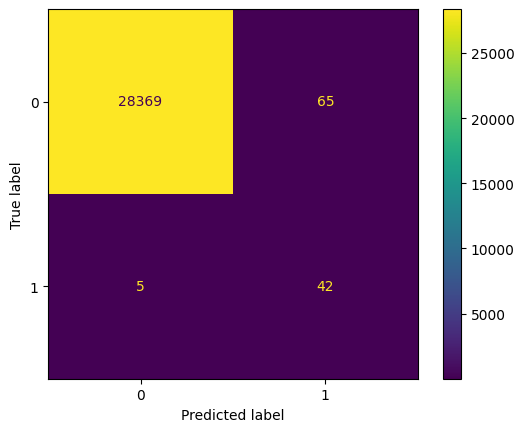

In [48]:
confusionMatrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
displayConfusionMatrix = ConfusionMatrixDisplay(confusionMatrix)
displayConfusionMatrix.plot()

# Tabular Transformer Model

In [36]:
!pip install tabtransformertf -q

from tabtransformertf.models.fttransformer  import FTTransformerEncoder, FTTransformer
from tabtransformertf.utils.preprocessing import df_to_dataset

In [61]:
numericFeatures = list(df[df.columns.drop('Class')].columns.values)
categoricalFeatures = []

In [62]:
import pandas as pd
import tensorflow as tf


def df_to_dataset_custom(dataframe, label_column=None, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()

    if label_column is not None:
        labels = dataframe.pop(label_column).to_numpy()
    else:
        labels = None

    # Reshape lại từng feature thành (batch_size, 1)
    features = {col: dataframe[col].to_numpy().reshape(-1, 1) for col in dataframe.columns}

    ds = tf.data.Dataset.from_tensor_slices((features, labels) if labels is not None else features)
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    return ds.batch(batch_size)

# Đảm bảo Series y có tên là 'Class'
y_train = pd.Series(y_train, name='Class')
y_valid = pd.Series(y_valid, name='Class')
y_test = pd.Series(y_test, name='Class')

# Ghép X và y thành DataFrame
trainDF = pd.concat([X_train, y_train], axis=1)
validDF = pd.concat([X_valid, y_valid], axis=1)
testDF = pd.concat([X_test, y_test], axis=1)

# Loại bỏ tuple trong tên cột (nếu có)
for df in [trainDF, validDF, testDF]:
    df.columns = [col[0] if isinstance(col, tuple) else col for col in df.columns]

# Loại bỏ các dòng có giá trị Class là 'Class' (header lặp lại)
for name, df in [('trainDF', trainDF), ('validDF', validDF), ('testDF', testDF)]:
    mask = (df['Class'].astype(str) != 'Class') & (df['Class'].notna())
    df_clean = df[mask].reset_index(drop=True)
    if name == 'trainDF':
        trainDF = df_clean
    elif name == 'validDF':
        validDF = df_clean
    else:
        testDF = df_clean

# Ép kiểu cho cột label
label_column = 'Class'
trainDF[label_column] = trainDF[label_column].astype('int64')
validDF[label_column] = validDF[label_column].astype('int64')
testDF[label_column] = testDF[label_column].astype('int64')

# Ép kiểu float32 cho các cột đặc trưng
for df in [trainDF, validDF, testDF]:
    for col in df.columns:
        if col != label_column:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            df[col] = df[col].astype('float32')

# Loại bỏ tuple trong danh sách cột nếu có
numericFeatures = [col[0] if isinstance(col, tuple) else col for col in numericFeatures]
categoricalFeatures = [col[0] if isinstance(col, tuple) else col for col in categoricalFeatures]

# Tạo TensorFlow Dataset
train_dataset = df_to_dataset_custom(trainDF, label_column=label_column, shuffle=False, batch_size=512)
val_dataset = df_to_dataset_custom(validDF, label_column=label_column, shuffle=False, batch_size=512)
test_dataset = df_to_dataset_custom(testDF.drop(columns=[label_column]), shuffle=False, batch_size=512)


In [63]:
# Khởi tạo Encoder
FTencoder = FTTransformerEncoder(
    numerical_features = numericFeatures,
    categorical_features = categoricalFeatures,
    numerical_data = trainDF[numericFeatures].values,
    categorical_data = None,
    y = trainDF[label_column].values,
    numerical_embedding_type='linear',
    embedding_dim=32,
    depth=2,
    heads=15,
    attn_dropout=0.1,
    ff_dropout=0.1,
    explainable=False
)

# Khởi tạo mô hình Transformer
tabTransformerModel = FTTransformer(
    encoder = FTencoder,
    out_dim = 1,
    out_activation = "sigmoid"
)

# Compile mô hình
tabTransformerModel.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics=['sparse_categorical_accuracy']
)

In [64]:
tabTransformerHistory = tabTransformerModel.fit(train_dataset, validation_data=val_dataset, epochs=5)

Epoch 1/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 32s 54ms/step - loss: 0.0422 - sparse_categorical_accuracy: 0.9697 - val_loss: 23.9027 - val_sparse_categorical_accuracy: 0.9982
Epoch 2/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - loss: 0.6988 - sparse_categorical_accuracy: 0.9697 - val_loss: 36.4414 - val_sparse_categorical_accuracy: 0.9982
Epoch 3/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - loss: 0.7433 - sparse_categorical_accuracy: 0.9697 - val_loss: 13.0430 - val_sparse_categorical_accuracy: 0.9982
Epoch 4/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 0.8035 - sparse_categorical_accuracy: 0.9697 - val_loss: 1.3766 - val_sparse_categorical_accuracy: 0.9982
Epoch 5/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - loss: 0.5774 - sparse_categorical_accuracy: 0.9697 - val_loss: 1.0998 - val_sparse_categorical_accuracy: 0.9982


<Axes: >

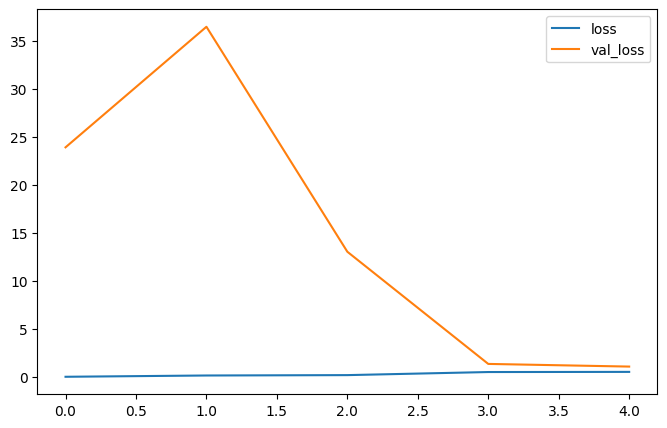

In [65]:
pd.DataFrame(tabTransformerHistory.history)[['loss','val_loss']].plot(figsize=(8,5))

In [66]:
tabPredictions = tabTransformerModel.predict(test_dataset)

56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step


In [67]:
tab_y_pred = [int(round(x[0])) for x in tabPredictions]

In [68]:
f1_score(tab_y_pred, y_test)

0.003295008412787437

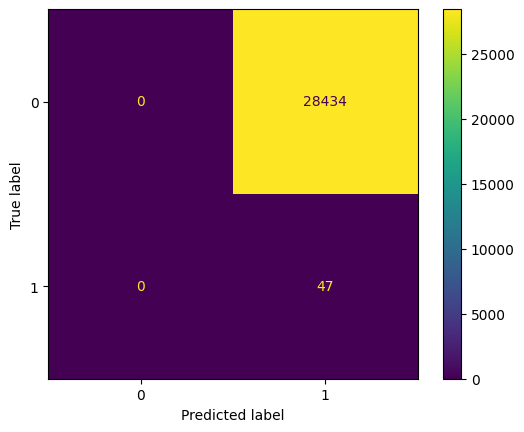

In [69]:
confusionMatrix = confusion_matrix(y_true=y_test, y_pred=tab_y_pred)
displayConfusionMatrix = ConfusionMatrixDisplay(confusionMatrix)
displayConfusionMatrix.plot()

In [70]:
periodicEncoder = FTTransformerEncoder(
    numerical_features = numericFeatures,
    categorical_features = categoricalFeatures,
    numerical_data = trainDF[numericFeatures].values,
    categorical_data = None,
    y = y_train.values,
    numerical_embedding_type='periodic',
    numerical_bins=128,
    embedding_dim=64,
    depth=3,
    heads=6,
    attn_dropout=0.3,
    ff_dropout=0.3,
    explainable=False
)

# Pass th encoder to the model
periodicTabTransformerModel = FTTransformer(
    encoder=periodicEncoder,
    out_dim=1,
    out_activation="sigmoid",
)

periodicTabTransformerModel.compile(  # compile with same hyperparameters
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics=['sparse_categorical_accuracy']
    )

In [71]:
periodicTabTransformerHistory = periodicTabTransformerModel.fit(train_dataset, validation_data=val_dataset, epochs=5)

Epoch 1/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - loss: 0.0231 - sparse_categorical_accuracy: 0.9697 - val_loss: 57.2899 - val_sparse_categorical_accuracy: 0.9982
Epoch 2/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - loss: 1.8450 - sparse_categorical_accuracy: 0.9697 - val_loss: 46.7386 - val_sparse_categorical_accuracy: 0.9982
Epoch 3/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - loss: 1.3507 - sparse_categorical_accuracy: 0.9697 - val_loss: 5.9692 - val_sparse_categorical_accuracy: 0.9982
Epoch 4/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - loss: 0.8306 - sparse_categorical_accuracy: 0.9697 - val_loss: 1.1949 - val_sparse_categorical_accuracy: 0.9982
Epoch 5/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - loss: 0.5486 - sparse_categorical_accuracy: 0.9697 - val_loss: 1.0274 - val_sparse_categorical_accuracy: 0.9982


<Axes: >

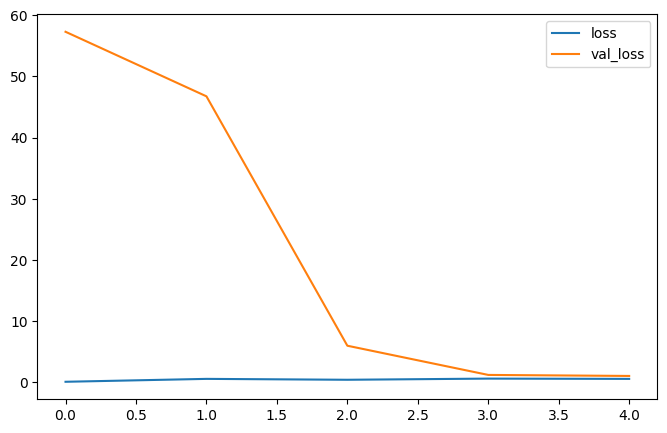

In [72]:
pd.DataFrame(periodicTabTransformerHistory.history)[['loss','val_loss']].plot(figsize=(8,5))

In [73]:
periodicPredictions = periodicTabTransformerModel.predict(test_dataset)
per_y_pred = [int(round(x[0])) for x in tabPredictions]

f1_score(per_y_pred, y_test)

56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step


0.003295008412787437

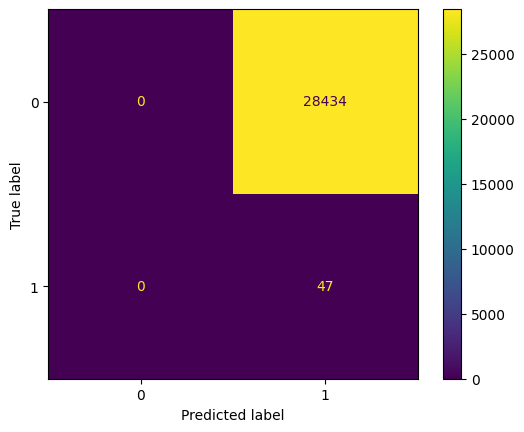

In [74]:
confusionMatrix = confusion_matrix(y_true=y_test, y_pred=per_y_pred)
displayConfusionMatrix = ConfusionMatrixDisplay(confusionMatrix)
displayConfusionMatrix.plot()